In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['winequality-red.csv']


In [ ]:
#DATAMIZI İNCELEMELİYİZ(we need to review our data)

In [2]:
data=pd.read_csv('../input/winequality-red.csv')
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#SINIFLANDIRMA MODELLERİMİZE GEÇEBİLİRİZ(WE CAN GO TO OUR CLASSIFICATION MODELS)

In [ ]:
#KNN CLASİFİCATİON

In [5]:
data.quality=[1 if each > 6 else 0 for each in data.quality]
y=data.quality
x=data.drop(['quality'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#VERİMİZİ NORMALİZE EDİYORUZ(NORMALİZE OF DATA)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('{} nn değeri için {} '.format(3,knn.score(x_test,y_test)))

3 nn değeri için 0.865625 


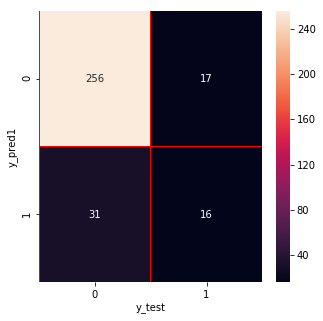

In [47]:
y_pred1=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [ ]:
#SUPER VECTOR CLASİFİCATİON

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
print('svm score :',svm.score(x_test,y_test))

svm score : 0.85


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


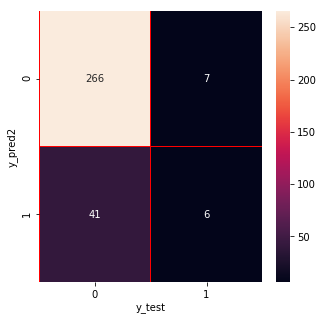

In [48]:
y_pred2=svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [ ]:
#NAİVE BAYES CLASİFİCATİON

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print('nb score :',nb.score(x_test,y_test))

nb score : 0.853125


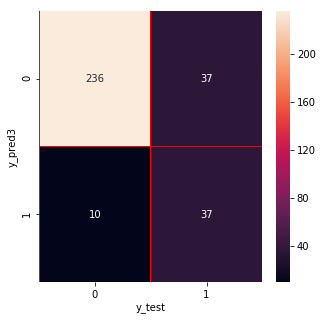

In [49]:
y_pred3=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [ ]:
#DECİSİON TREE CLASİFİCATİON

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('dt score',dt.score(x_test,y_test))

dt score 0.865625


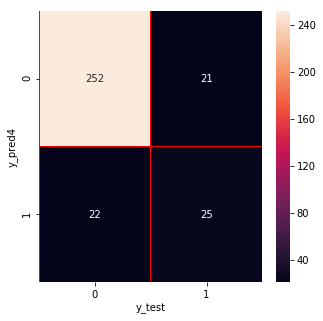

In [50]:
y_pred4=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [ ]:
#RANDOM FOREST CLASİFİCATİON

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
print('rf score :',rf.score(x_test,y_test))

rf score : 0.9


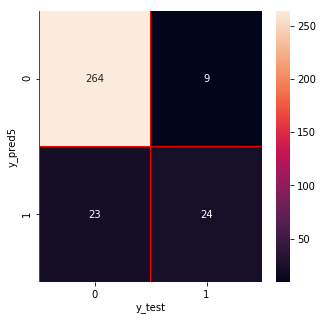

In [51]:
y_pred5=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred5)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [ ]:
#TÜM CLASİFİCATİON METODLARIMIZIN SONUÇLARINI BİR PLOTTA GÖSTERELİM
#(SHOWING THE RESULTS OF OUR CLASIFICATİON METHODS ON A PLOT)

In [62]:
dicti={'knn_score':knn.score(x_test,y_test),'svm_score':svm.score(x_test,y_test),
           'nb_score':nb.score(x_test,y_test),'dt_score': dt.score(x_test,y_test),
          'rf_score':rf.score(x_test,y_test)}

In [65]:
for key,value in dicti.items():
    print(key," : ",value)
    
print('')

knn_score  :  0.85
svm_score  :  0.85
nb_score  :  0.853125
dt_score  :  0.865625
rf_score  :  0.9



In [76]:

key_lis=list(('knn_score','svm_score','nb_score','dt_score','rf_score'))
value_lis=list((0.85,0.85,0.853125,0.865625,0.9))

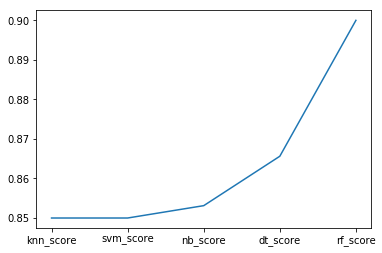

In [77]:
plt.plot(key_lis,value_lis)
plt.show()

In [ ]:
#CONCLUSİON

#Bu verimiz için en uygun methodumuz RANDOM FOREST 
#çünkü en doğru tahmin yukarıda görüldüğü gibi RF methodunda elde edildi.
#(Our best method for this data is RANDOM FOREST
# Because the most accurate estimate was obtained in the RF method as seen above)